**Project: Capstone Project 1: Exploratory Data Analysis**

As per [article] (https://www.post-gazette.com/news/transportation/2018/12/02/Healthy-Ride-Pittsburgh-bike-sharing-program-adding-stations-new-neighborhoods/stories/201812020119)  published in  on DEC 3, 2018; there was a noticeable drop in ridership from 2016 to 2017. I would like to to test whether this hypothesis is commensurate with the data.  My consolidated dataset has data from  from 2015, Quarter 2 to 2018, Quarter 4.
The samples are independent of each other and are random. I would be perfoming a two sample, one-tailed upper test  Z test. I would be also be performing a two sample Bootstrap hypothesis test with null hypothesis being that there is no difference in means with regards to the average number of trip counts.

Null Hypothesis:

$ Ho : \mu_{1} = \mu_{2} $ 


Alternate Hypothesis:

$ Ha: \mu_{1} > \mu_{2}  $

Let's also explore the average number of trips taken in each station.

In [18]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("pittsburgh_healthy_rides_data.csv")

In [22]:
df.head(2)

,start_time,trip_id,stop_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,station_name,user_type,...,rain,wind,weather,hour,month,speed,day_of_the_week,tripdate,num_trips,year
0,2015-05-31 07:18:00,10677999,2015-05-31 07:52:00,70381,2018,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber,...,0.37,8.95,good,7,5,5.41,Sunday,2015-05-31,158,2015
1,2015-05-31 07:25:00,10678335,2015-05-31 07:57:00,70331,1900,1005,Forbes Ave & Grant St,1000,Liberty Ave & Stanwix St,Customer,...,0.37,8.95,good,7,5,0.80,Sunday,2015-05-31,158,2015


In [23]:
df.columns

Index(['start_time', 'trip_id', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id', 'station_name',
       'user_type', 'TMAX', 'TMIN', 'season', 'holiday', 'walk_score',
       'transit_score', 'bike_score', 'distance', 'event_type', 'rain', 'wind',
       'weather', 'hour', 'month', 'speed', 'day_of_the_week', 'tripdate',
       'num_trips', 'year'],
      dtype='object')

In [26]:
#Segregate the data based on the year

trips_2016, trips_2017 = df[df['year']==2016]['num_trips'], df[df['year']==2017]['num_trips']

In [27]:
def diff_of_means(data_1,data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) -  np.mean(data_2)

    return diff
empirical_diff_means = diff_of_means(trips_2016, trips_2017)
print(f"Trip_2016 mean : {np.mean(trips_2016)}")

print(f"Trip_2017 mean : {np.mean(trips_2017)}")
print(f"Empirical difference of means: {empirical_diff_means}")


Trip_2016 mean : 177.5320957668286
Trip_2017 mean : 164.8740123750595
Empirical difference of means: 12.658083391769111


The average number of trips of the year 2016 was 177.53 , and that of year 2017 was 164.87 with a difference of 12.66. It is possible this observed difference in mean of  trip counts  was by chance. We will compute the probability of getting at least a 12.66 difference in average number of trips under the hypothesis that the average number of trip counts in both years are identical.

ECDFs are often even better when doing Exploratory Data Analysis. ECDF is Empirical Cumulative Distribution Function . x- value of ECDF is the quantity you are measuring. The y value(0 to 1 probalibility) is the fraction of datapoints that have a value smaller than the corresponding x value.

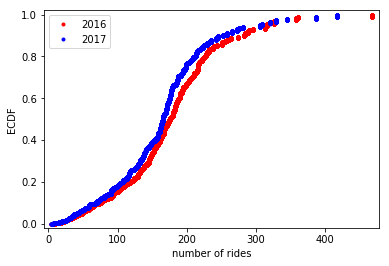

In [28]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1)/float(len(data))


# Create and plot ECDFs from original data
x_1, y_1 = ecdf(trips_2016)
x_2, y_2 = ecdf(trips_2017)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label ="2016")
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label = "2017")

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('number of rides')
_ = plt.ylabel('ECDF')
_ = plt.legend()
plt.show()


Notice that the Ecdfs do not overlap except a few of suggesting that the hypothesis is not commensurate with the data. Let's fid out!



Frequentist Approach:

For our hypothesis to be true, we are going to figure out the probability of getting the actual difference of  means between 2016 and 2017 to be zero under the assumption that our hypothesis is correct. It is going to be a one-tailed upper test. I will set aplha to be 0.05. 
Alpha level is the probability of making te wrong decision when the null hypothesis is true.

Null Hypothesis:

$ Ho : \mu_{1} = \mu_{2} $ 


Alternate Hypothesis:

$ Ha: \mu_{1} > \mu_{2}  $


The Z-test is used to compare the population mean against a sample or compare the population mean of two distributions with a sample size greater than 30. The samples are independent of each other and are random. First, we calculate the z-score to find how many standard deviations away  from $\mu$ as below:

Mean of number of rides per day in 2016($\mu_1$)  = 177.53$

Mean of number of rides per day in 2017($\mu_2$)  = 164.87$

Difference of means between 2016 and 2017 = diff_of_means(trips_2016, trips_2017)

Standard Error(SE) is the standard error of the distribution of differences which is also the standard deviation of that sampling distribution:

SE =  $\sqrt{\frac{\sigma^2_1 }{n_1} + \frac{ \sigma^2_2 }{n_2}}$ 


We can calculate the pooled sample of mean and the standard error (SE) from the sample data. Using those measures, we can compute the z-score test statistic (z).

μo is Hypothesized mean difference which is 0 in this case because according to null hypothesis is there’s no difference.
μo = 0

z-score  = $\frac{(\mu_1 - \mu_2 )- \mu_0}{\sqrt{\frac{\sigma^2_1 }{n_1} + \frac{ \sigma^2_2 }{n_2}}}$

If the Z-score falls in the rejection region, and when the p-value is less than the threshold significance level, which in our case is 5%, we can conclude that the results in difference of means was in fact statistically significant and reject the null hypothesis. Else we fail to reject the null hypothesis.


In [29]:
import scipy
from scipy import stats

#Segregate date based on year
trips_2016, trips_2017 = df[df['year']==2016]['num_trips'], df[df['year']==2017]['num_trips']


# number of  trips taken  per day in 2016
n_2016 =sum(df[df.year==2016].num_trips)
print(f"Total number of trips taken per day in 2016 (n_2016) :{n_2016}")

# number of  trips taken per day in 2017
n_2017 =sum(df[df.year==2017].num_trips)
print(f"Total number of rides taken per day in 2017 (n_2017) :{n_2017}")

# number of trips
n1 = len(trips_2016)
print(f"Number of days in trip_2016 data (n1): {n1}")

# number of trips
n2 = len(trips_2017)
print(f"Number of days in  trips_2017 data(n2): {n2}")

"""Alpha level is the probability of making the wrong decision when the null hypothesis is true."""
# Find 95% confidence intervals
crit = stats.norm.isf(0.05)
print(f" Critical value(z-crit) or the boundary of 95% confidence interval of one-tailed upper right test when alpha(rejection region) = 0.05 is +{crit}")
     

#μo which is Hypothesized mean difference is 0 because according to null hypothesis is there’s no difference.
μo = 0

"""SE is the standard error of the distribution of differences which is also the standard deviation of tht sampling distribution"""
SE = np.sqrt((np.std(trips_2016) ** 2/ n1) + (np.std(trips_2017) ** 2/ n2))
print(f"One standard deviation away from 0 would be {SE} SE ")

print(f"Margin of error for interval estimates of difference for these samples is {crit * SE}")

z = ((diff_of_means(trips_2016, trips_2017)) - μo) / SE

print(f"we expect 95% of the sample differences to be in this region: {crit * SE}")
print(f"Z-score  is {z}")

p_val = scipy.stats.norm.sf(abs(z))

if p_val < 0.05:
    print("Since p-value < 0.05, we reject Null Hypothesis")
else:
    print("Accept null hypothesis")

Total number of trips taken per day in 2016 (n_2016) :8186360
Total number of rides taken per day in 2017 (n_2017) :6928006
Number of days in trip_2016 data (n1): 46112
Number of days in  trips_2017 data(n2): 42020
 Critical value(z-crit) or the boundary of 95% confidence interval of one-tailed upper right test when alpha(rejection region) = 0.05 is +1.6448536269514729
One standard deviation away from 0 would be 0.5106802263456857 SE 
Margin of error for interval estimates of difference for these samples is 0.8399942225171002
we expect 95% of the sample differences to be in this region: 0.8399942225171002
Z-score  is 24.786711407151095
Since p-value < 0.05, we reject Null Hypothesis


**Conclusion:**

The Z-score falls in the rejection region, and the p-value is less than the threshold significance level, which in our case is 5%, we can conclude that the results in difference of means was in fact statistically significant and we can reject the null hypothesis.


*Two-sample bootstrap hypothesis test for difference of means:*

We now want to test the hypothesis that the year 2016 and 2017 have the same  average trip counts using the two-sample bootstrap test. Here, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value will be the fraction of replicates with a difference in means greater than or equal to what was observed.

In [30]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Concatenate trips: trips_concat
trips_concat = np.concatenate((trips_2016, trips_2017))
# Compute mean of all trips: mean_trips
mean_trips = np.mean(trips_concat)

# Generate shifted arrays
trip_2016_shifted = trips_2016 - np.mean(trips_2016) + mean_trips
trip_2017_shifted = trips_2017 - np.mean(trips_2017) + mean_trips

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_2016 = draw_bs_reps(trip_2016_shifted, np.mean,size= 10000)
bs_replicates_2017 = draw_bs_reps(trip_2017_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_2016 - bs_replicates_2017

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)

#Confidence Interval(ci)
ci = np.percentile(bs_replicates, [95])
print(f" Since it is a one tailed test,  there is a 95% chance that the  mean difference estimate by performing bootstrap resampling is : {1-ci}")
print('p-value :', p)
if p < 0.05:
    print("Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with 95 % confidence")
else:
    print("Accept null hypothesis")

 Since it is a one tailed test,  there is a 95% chance that the  mean difference estimate by performing bootstrap resampling is : [0.15600313]
p-value : 0.0
Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with 95 % confidence


In [31]:
#explore the data
a =pd.read_csv("Healthy_Rides_Data.csv", parse_dates = ["start_time","stop_time"])

Let's explore average number of bikes rented per day, both overall and for individual stations including the days that were unaccounted for (Zero days). We have to create an empty dataframe based range of dates from the start till end date of the given time period. Then we have to merge after grouping the data as below:

In [32]:
# Create range of dates to use as an index
start = pd.datetime(2015, 5, 31)
end = pd.datetime(2018, 12, 27)
rng = pd.date_range(start, end) 

#Create an empty DataFrame using the range of dates as the index.
trips_by_date_new = pd.DataFrame(index=rng)



In [33]:
#Use groupby on the original trip DataFrame to compute number of trips by date
# Create a Group by object using tripdate
grp_date = a.groupby(['tripdate'])

# Compute number of trips by date and check out the result
trips_by_date = pd.DataFrame(grp_date.size(), columns=['num_trips'])

# Merge the two DataFrames on their indexes (tripdate) but do a "left join" with new dataframe on left.
trips_by_date_merged = pd.merge(trips_by_date_new, trips_by_date, how='left', left_index=True, right_index=True, sort=True)


#Replace missing values with zeroes for those dates with no trips
# Fill in any missing values with 0.
trips_by_date_merged['num_trips'] = trips_by_date_merged['num_trips'].fillna(0)

print(trips_by_date_merged.head())

            num_trips
2015-05-31      158.0
2015-06-01       52.0
2015-06-02       62.0
2015-06-03       83.0
2015-06-04      127.0


In [34]:
# Compute the average
mean_trips = trips_by_date_merged['num_trips'].mean()
tot_tripdates = trips_by_date_merged['num_trips'].count() 
num_days = (trips_by_date_merged.index.max() - trips_by_date_merged.index.min()).days + 1

print("The mean number of trips overall per day is {:.2f} out of  {} tripdates.".format(mean_trips, tot_tripdates))
print(f"Date range is from {trips_by_date.index.min()} : {trips_by_date.index.max()} ")
print("There are {} days in the date range.".format(num_days))

The mean number of trips overall per day is 124.95 out of  1307 tripdates.
Date range is from 2015-05-31 : 2018-12-30 
There are 1307 days in the date range.


The average number of bikes rented per day overall is ~124 bikes. Now, we will find the average number of bikes per station.

In [35]:
#read the csv file
trip = pd.read_csv("Pittsburgh_healthy_bikeshare.csv", parse_dates = ["start_time","stop_time"])

In [36]:
trip["from_station_id"] = trip["from_station_id"].astype(str)

#Average number of rentals per day at individual station including zero days:

stations = trip["from_station_id"].unique()

#add a trip date column
trip['tripdate'] = trip['start_time'].map(lambda x: x.date())

def daily_avg_trips_new(stations, start_date = pd.datetime(2015, 5, 31), end_date = pd.datetime(2018, 12, 27)):
       
    
    for station_id in stations:
        rng = pd.date_range(start_date, end_date)
        trips_by_date_new = pd.DataFrame(index=rng)
        trips_by_date_new['weekday'] = trips_by_date_new.index.map(lambda x: x.weekday())
        grp_date = trip[(trip.from_station_id == station_id)].groupby(['tripdate'])
        # Compute number of trips by date 
        trips_by_date = pd.DataFrame(grp_date.size(), columns=['num_trips'])

        # Step 4: Merge the two DataFrames on their indexes (tripdate) but do a "left join". 
        trips_by_date_merged = pd.merge(trips_by_date_new, trips_by_date, how='left', left_index=True, right_index=True, sort=True)
    
        # Step 5: Replace missing values with zeroes for those dates with no trips
        trips_by_date_merged['num_trips'] = trips_by_date_merged['num_trips'].fillna(0)
    
        # Compute the average
        mean_trips = round(trips_by_date_merged['num_trips'].mean(),2)
        tot_tripdates = trips_by_date_merged['num_trips'].count() 
        num_days = (trips_by_date_merged.index.max() - trips_by_date_merged.index.min()).days + 1
        print(f"The mean number of trips for station_id {station_id}  per day is  {mean_trips}  out of {tot_tripdates} tripdates.")

        #print("The mean number of trips per day is {:.2f} out of  {} tripdates.".format(mean_trips, tot_tripdates))
    print(f"Date range is from {trips_by_date.index.min()} : {trips_by_date.index.max()} ")
    print("There are {} days in the date range.".format(num_days))
    
    


In [37]:
i = daily_avg_trips_new(stations)

The mean number of trips for station_id 1019  per day is  3.11  out of 1307 tripdates.
The mean number of trips for station_id 1005  per day is  2.32  out of 1307 tripdates.
The mean number of trips for station_id 1050  per day is  0.91  out of 1307 tripdates.
The mean number of trips for station_id 1001  per day is  6.8  out of 1307 tripdates.
The mean number of trips for station_id 1009  per day is  2.63  out of 1307 tripdates.
The mean number of trips for station_id 1000  per day is  5.78  out of 1307 tripdates.
The mean number of trips for station_id 1002  per day is  2.79  out of 1307 tripdates.
The mean number of trips for station_id 1006  per day is  3.04  out of 1307 tripdates.
The mean number of trips for station_id 1036  per day is  2.74  out of 1307 tripdates.
The mean number of trips for station_id 1010  per day is  6.19  out of 1307 tripdates.
The mean number of trips for station_id 1015  per day is  2.6  out of 1307 tripdates.
The mean number of trips for station_id 1017 

Looks like the average number of rentals per day at individual station including zero days is maximum at station #1010